In [1]:
import pandas as pd

In [2]:
data_banjir = pd.read_excel('C:/Users/ivanm/Documents/DOCUMENTS/BELAJAR/TETRIS/Project/Data Bencana.xlsx')

In [3]:
data_banjir.head(5)

,No.,ID Kabupaten,Tanggal Kejadian,Kejadian,Lokasi,Kabupaten,Provinsi,Kronologi & Dokumentasi,Penyebab,Meninggal,Hilang,Terluka,Rumah Rusak,Rumah Terendam,Fasum Rusak
0,1,5304,2022-06-30,BANJIR,Kec. Kualin Ds. Toineke Kec.Amanatun Selatan ...,TIMOR TENGAH SELATAN,NUSA TENGGARA TIMUR,NaN,Dipicu curah hujan dengan intensitas tinggi me...,2.0,1.0,0.0,6,100.0,2
1,2,1709,2022-06-30,BANJIR,Kec. Talang Empat Ds. Pulau Panggung Ds. Jaya ...,BENGKULU TENGAH,BENGKULU,NaN,●Dipicu hujan dengan intensitas tinggi,0.0,0.0,0.0,0,273.0,0
2,3,1701,2022-06-30,BANJIR,Kec. Pino Raya Ds.Telaga dalam,BENGKULU SELATAN,BENGKULU,NaN,●Dipicu hujan dengan intensitas cukup tinggi y...,0.0,0.0,0.0,0,33.0,0
3,4,2104,2022-06-30,BANJIR,Kec. Singkep Kel. Dabo Lama Ds. Batu Berdaun D...,LINGGA,KEPULAUAN RIAU,NaN,●Dipicu oleh luapan sungai dan pasang air laut,0.0,0.0,0.0,0,22.0,2
4,5,6201,2022-06-30,BANJIR,Kec. Pangkalan Banteng Ds. Sungai Hijau Kec. ...,KOTAWARINGIN BARAT,KALIMANTAN TENGAH,NaN,●Dipicu oleh hujan dengan intensitas tinggi,0.0,0.0,0.0,0,66.0,0


In [4]:
data_banjir.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11973 entries, 0 to 11972
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   No.                      11973 non-null  int64         
 1   ID Kabupaten             11973 non-null  int64         
 2   Tanggal Kejadian         11973 non-null  datetime64[ns]
 3   Kejadian                 11973 non-null  object        
 4   Lokasi                   5030 non-null   object        
 5   Kabupaten                11973 non-null  object        
 6   Provinsi                 11973 non-null  object        
 7   Kronologi & Dokumentasi  7229 non-null   object        
 8   Penyebab                 3963 non-null   object        
 9   Meninggal                11247 non-null  float64       
 10  Hilang                   11219 non-null  float64       
 11  Terluka                  11229 non-null  float64       
 12  Rumah Rusak              11973 n

In [5]:
data_banjir.isnull().sum() 

No.                           0
ID Kabupaten                  0
Tanggal Kejadian              0
Kejadian                      0
Lokasi                     6943
Kabupaten                     0
Provinsi                      0
Kronologi & Dokumentasi    4744
Penyebab                   8010
Meninggal                   726
Hilang                      754
Terluka                     744
Rumah Rusak                   0
Rumah Terendam              259
Fasum Rusak                   0
dtype: int64

In [6]:
data_banjir['Kronologi & Dokumentasi'].unique()

array([nan, 'Curah Hujan Tinggi / ROB',
       'Dikarenakan Curah Hujan Dengan Intensitas Tinggi  Menyebabkan Air Laut Di Sekitar Wilayah kp. Karangmulya dan kp pancer  Naik Ke Pemukiman Warga',
       ...,
       'Pengerahan personel TNI lima orang anggota Kodim 0608/Cianjur melaksanakan kerja bakti bersama masyarakat',
       'PMI Pasuruan :melakukan pendataan dan mendirikan dapur umum yang menyediakan 1500 paket perhari',
       'Warga dibantu petugas membersihkan sisa kotoran yang mengganggu linkungan.'],
      dtype=object)

In [7]:
data_banjir['Penyebab'].describe()

count                                        3963
unique                                       2885
top       • Akibat hujan dengan intensitas tinggi
freq                                          428
Name: Penyebab, dtype: object

In [8]:
data_banjir['Penyebab'].fillna(data_banjir['Kronologi & Dokumentasi'], inplace=True)

In [9]:
data_banjir['Penyebab'].isnull().sum()

1059

In [10]:
data_banjir[['Meninggal', 'Hilang', 'Terluka']].sum()

Meninggal     2486.0
Hilang         607.0
Terluka      39963.0
dtype: float64

In [11]:
data_banjir[['Rumah Rusak', 'Rumah Terendam', 'Fasum Rusak']].sum()

Rumah Rusak        328019.0
Rumah Terendam    6423349.0
Fasum Rusak         25978.0
dtype: float64

In [12]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [13]:
data_banjir_penyebabCleaned = data_banjir.dropna(subset = ['Penyebab'])
data_banjir_penyebabCleaned

,No.,ID Kabupaten,Tanggal Kejadian,Kejadian,Lokasi,Kabupaten,Provinsi,Kronologi & Dokumentasi,Penyebab,Meninggal,Hilang,Terluka,Rumah Rusak,Rumah Terendam,Fasum Rusak
0,1,5304,2022-06-30,BANJIR,Kec. Kualin Ds. Toineke Kec.Amanatun Selatan ...,TIMOR TENGAH SELATAN,NUSA TENGGARA TIMUR,NaN,Dipicu curah hujan dengan intensitas tinggi me...,2.0,1.0,0.0,6,100.0,2
1,2,1709,2022-06-30,BANJIR,Kec. Talang Empat Ds. Pulau Panggung Ds. Jaya ...,BENGKULU TENGAH,BENGKULU,NaN,●Dipicu hujan dengan intensitas tinggi,0.0,0.0,0.0,0,273.0,0
2,3,1701,2022-06-30,BANJIR,Kec. Pino Raya Ds.Telaga dalam,BENGKULU SELATAN,BENGKULU,NaN,●Dipicu hujan dengan intensitas cukup tinggi y...,0.0,0.0,0.0,0,33.0,0
3,4,2104,2022-06-30,BANJIR,Kec. Singkep Kel. Dabo Lama Ds. Batu Berdaun D...,LINGGA,KEPULAUAN RIAU,NaN,●Dipicu oleh luapan sungai dan pasang air laut,0.0,0.0,0.0,0,22.0,2
4,5,6201,2022-06-30,BANJIR,Kec. Pangkalan Banteng Ds. Sungai Hijau Kec. ...,KOTAWARINGIN BARAT,KALIMANTAN TENGAH,NaN,●Dipicu oleh hujan dengan intensitas tinggi,0.0,0.0,0.0,0,66.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11968,11969,5204,2010-01-01,BANJIR,NaN,SUMBAWA,NUSA TENGGARA BARAT,-,-,0.0,0.0,0.0,0,0.0,0
11969,11970,3517,2010-01-01,BANJIR,NaN,JOMBANG,JAWA TIMUR,-,-,0.0,0.0,0.0,0,0.0,0
11970,11971,1401,2010-01-01,BANJIR,NaN,KUANTAN SINGINGI,RIAU,-,-,0.0,0.0,0.0,0,0.0,0
11971,11972,1302,2010-01-01,BANJIR,NaN,PESISIR SELATAN,SUMATERA BARAT,-,-,0.0,0.0,0.0,0,0.0,0


In [14]:
data_banjir_penyebabCleaned['Penyebab'].isnull().sum()

0

In [15]:
comment_words = ''
stopwords = set(STOPWORDS)

In [16]:
# iterate through the csv file
for val in data_banjir_penyebabCleaned['Penyebab']:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "

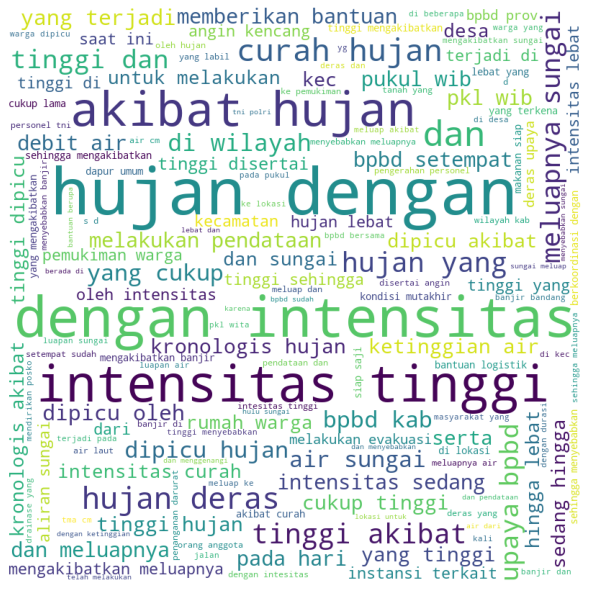

In [17]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [18]:
banjir_perthn = pd.Series.to_frame(data_banjir['Kejadian'].groupby(data_banjir['Tanggal Kejadian'].dt.year).agg('count'))

In [19]:
banjir_perthn = banjir_perthn.reset_index()

In [20]:
banjir_perthn = banjir_perthn.iloc[0:12, :]
banjir_perthn

,Tanggal Kejadian,Kejadian
0,2010,1101
1,2011,578
2,2012,593
3,2013,761
4,2014,610
5,2015,531
6,2016,825
7,2017,980
8,2018,884
9,2019,790


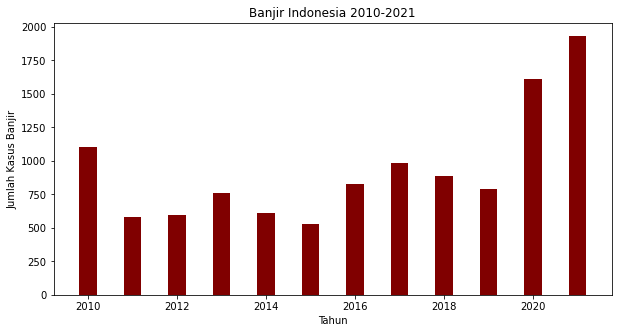

In [21]:
fig1 = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(banjir_perthn['Tanggal Kejadian'], banjir_perthn['Kejadian'], color ='maroon',
        width = 0.4)

plt.xlabel("Tahun")
plt.ylabel("Jumlah Kasus Banjir")
plt.title("Banjir Indonesia 2010-2021")
plt.show()

In [22]:
banjir_perbln = pd.Series.to_frame(data_banjir['Kejadian'].groupby(data_banjir['Tanggal Kejadian'].dt.month).agg('count'))

In [23]:
banjir_perbln = banjir_perbln.reset_index()

In [24]:
banjir_perbln['Tanggal Kejadian'] = banjir_perbln['Tanggal Kejadian'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                                      ['January', 'February', 'March', 'April', 'May', 'June', 'July', 
                                       'August', 'September', 'October', 'November','December'])

In [25]:
banjir_perbln

,Tanggal Kejadian,Kejadian
0,January,1830
1,February,1722
2,March,1379
3,April,1177
4,May,969
5,June,690
6,July,518
7,August,328
8,September,469
9,October,569


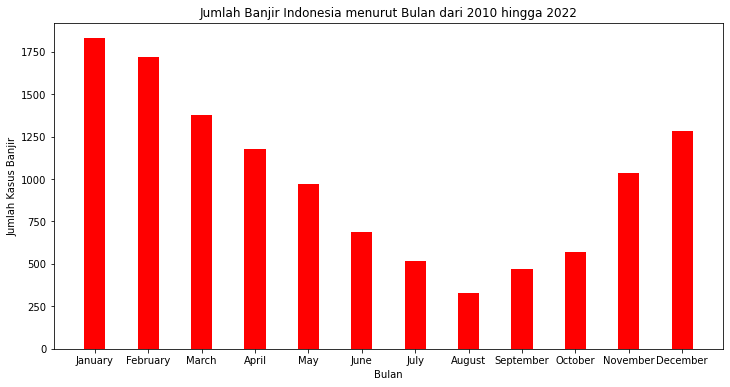

In [26]:
fig1 = plt.figure(figsize = (12,6))
 
# creating the bar plot
plt.bar(banjir_perbln['Tanggal Kejadian'], banjir_perbln['Kejadian'], color ='red',
        width = 0.4)

plt.xlabel("Bulan")
plt.ylabel("Jumlah Kasus Banjir")
plt.title("Jumlah Banjir Indonesia menurut Bulan dari 2010 hingga 2022")
plt.show()

In [27]:
data_banjir['Kejadian'].groupby(data_banjir['Kabupaten']).agg('count').sort_values(ascending=False)

Kabupaten
BANDUNG               288
BOGOR                 220
CILACAP               171
BOJONEGORO            135
SERANG                114
                     ... 
TAPANULI UTARA          1
KEPULAUAN SELAYAR       1
KOTA BANDA ACEH         1
KEPULAUAN TANIMBAR      1
demak                   1
Name: Kejadian, Length: 501, dtype: int64

In [28]:
banjir_bandung = data_banjir[data_banjir['Kabupaten'] == 'BANDUNG'].sort_values('Tanggal Kejadian')

In [29]:
banjir_bandung.head()

,No.,ID Kabupaten,Tanggal Kejadian,Kejadian,Lokasi,Kabupaten,Provinsi,Kronologi & Dokumentasi,Penyebab,Meninggal,Hilang,Terluka,Rumah Rusak,Rumah Terendam,Fasum Rusak
11913,11914,3204,2010-01-07,BANJIR,NaN,BANDUNG,JAWA BARAT,-,-,0.0,0.0,0.0,10,817.0,0
11859,11860,3204,2010-01-27,BANJIR,NaN,BANDUNG,JAWA BARAT,-,-,0.0,0.0,399.0,0,0.0,1
11850,11851,3204,2010-01-29,BANJIR,NaN,BANDUNG,JAWA BARAT,Pengerahan personel TNI dua puluh orang anggot...,Pengerahan personel TNI dua puluh orang anggot...,0.0,0.0,0.0,0,10804.0,26
11845,11846,3204,2010-01-30,BANJIR,NaN,BANDUNG,JAWA BARAT,-,-,0.0,0.0,0.0,0,390.0,0
11836,11837,3204,2010-02-01,BANJIR,NaN,BANDUNG,JAWA BARAT,-,-,0.0,0.0,0.0,492,3000.0,0


In [30]:
banjir_bandung.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 288 entries, 11913 to 56
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   No.                      288 non-null    int64         
 1   ID Kabupaten             288 non-null    int64         
 2   Tanggal Kejadian         288 non-null    datetime64[ns]
 3   Kejadian                 288 non-null    object        
 4   Lokasi                   86 non-null     object        
 5   Kabupaten                288 non-null    object        
 6   Provinsi                 288 non-null    object        
 7   Kronologi & Dokumentasi  202 non-null    object        
 8   Penyebab                 267 non-null    object        
 9   Meninggal                281 non-null    float64       
 10  Hilang                   280 non-null    float64       
 11  Terluka                  280 non-null    float64       
 12  Rumah Rusak              288 non-

In [31]:
banjir_bandung['Lokasi'].describe()

count                                                    86
unique                                                   80
top       KEC DAYEUHKOLOT KEC BALEENDAH KEC BOJONGSOANG ...
freq                                                      3
Name: Lokasi, dtype: object

In [47]:
banjir_bandung['Lokasi'].unique()

array([nan,
       'Kec. Baleendah Ds. Baleendah Kp. Cigosol Kp. Muara Kp. Ciputat Kp. Uwak Kp. Cibadak Kp. Parunghalang Kp. Ciodeng Kp. Andir Kec. Dayeuhkolot Ds. Citeureup Kp. Bojongasih Kp. Babakan cilisung Kp. Cilisung Kp. Bolero Kp. kaum Kec. Bojongsoang Ds. Cijagra Kp. Cileunyi Kp. Jajaway',
       'Kec. Cilengkrang Ds. Jatiendah',
       'Kec. Dayeuhkolot Ds. Dayeuhkolot Kec. Baleendah Kel. Andir Kec. Bojong Soang Kec. Cicalengka Kec. Cileunyi DS. Cimekar',
       'Kec. Dayeuhkolot Ds.  Dayeuhkolot Kel. Pesawahan  Ds. Citeurep Kec. Baleendah  Kel. Andir  Kel. Baleendah  Kel. Bojongsoang',
       'Kab. Bandung Kec. Pangalengan Ds. Margamukti Kec. Dayeuhkolot Ds. Dayeuhkolot Kel. Pesawahan Kec. Baleendah Kel. Andir Kel. Baleendah Kec. Banjaran',
       'Kec. Dayeuhkolot Ds. Dayeuhkolot Ds. Citereup Kel. Pesawahan Kec. Bojongsoang Ds. Bojongsoang Kec. Baleendah Kel. Andir Kel. Baleendah Kec. Majalaya Kec. Ibun',
       'Kec. Kertasari Ds. Cibereum Kec. Pasir Jambu Ds. Mekarsari',
 

In [32]:
banjir_bandung['Tanggal Kejadian']=banjir_bandung['Tanggal Kejadian'].dt.to_period('M')

In [33]:
import seaborn as sns

In [34]:
banjir_bdg_pertahun = banjir_bandung.pivot_table(values='Kejadian', index='Tanggal Kejadian', aggfunc='count')
banjir_bdg_pertahun.head()

,Kejadian
Tanggal Kejadian,
2010-01,4
2010-02,13
2010-03,16
2010-04,5
2010-05,9


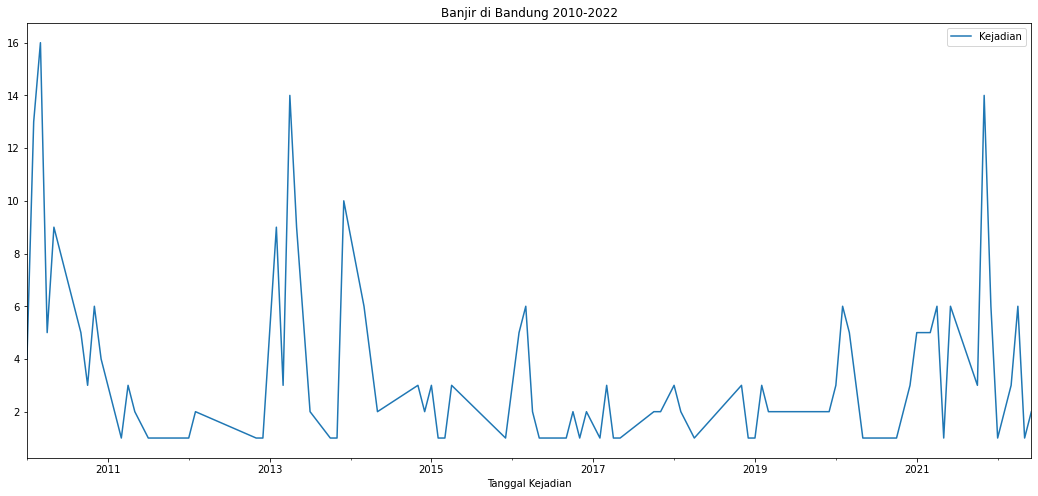

In [35]:
banjir_bdg_pertahun.plot(style='-', figsize=(18,8), title="Banjir di Bandung 2010-2022")
plt.show()

In [36]:
banjir_bandung['Lokasi'].value_counts().idxmax()

'KEC DAYEUHKOLOT KEC BALEENDAH KEC BOJONGSOANG KEC CILEUNYI KEC RANCAEKEK'

In [37]:
banjir_bdg_cleaned = data_banjir.dropna(subset = ['Lokasi'])

In [38]:
comment_words3 = ''
stopwords3 = set(STOPWORDS)

In [39]:
# iterate through the csv file
for val3 in banjir_bandung['Lokasi']:
     
    # typecaste each val3 to string
    val3 = str(val3)
 
    # split the value
    tokens3 = val3.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens3)):
        tokens3[i] = tokens3[i].lower()
     
    comment_words3 += " ".join(tokens3)+" "

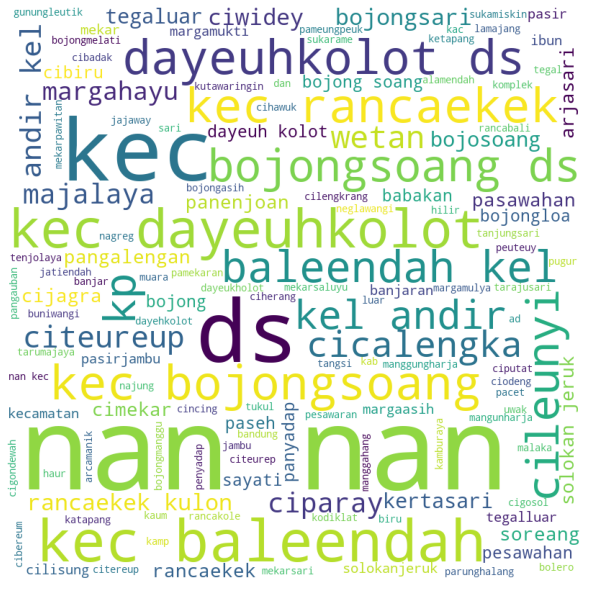

In [40]:
wordcloud3 = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords3,
                min_font_size = 10).generate(comment_words3)

# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud3)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [45]:
banjir_bandung['Lokasi'].str.count("Kec. Baleendah|KEC BALEENDAH").sum()

33.0

In [48]:
banjir_bandung['Lokasi'].str.count("Kec. Bojongsoang|KEC BOJONGSOANG").sum()

20.0

In [50]:
banjir_bandung['Lokasi'].str.count("Kec. Dayeuhkolot|KEC DAYEUHKOLOT").sum()

28.0